In [5]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [6]:
df<-read.csv('./Delivery_Time2.csv')

In [7]:
colnames(df)<-c('Time','Case','Distance')

In [8]:
fit<-lm(Time~.,data=df)

nonlinear regression이나 glm 같은 경우 asymtotic inference를 사용하기 떄문에 large sample에 기반함<br>
bootstrapping은 이런 상황에서 신뢰할만한 estimates를 결정할 수 있음<br>
원래 샘플에서 복원 추출(resampling)

In [9]:
summary(fit)


Call:
lm(formula = Time ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
Case        1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


In [10]:
fit$coefficients
confint(fit)

(Intercept)        Case    Distance 
 2.34123115  1.61590721  0.01438483

,2.5 %,97.5 %
(Intercept),0.066751987,4.61571030
Case,1.261824662,1.96998976
Distance,0.006891745,0.02187791


B1_hat의 estimate은 1.61591, sd는 0.17073

In [11]:
set.seed(1)
n<-dim(df)[1]
m<-1000 #bootstrap iteration

Beta_star<-rep(0,m)

for (i in 1:m){
        star<-sample((1:n),n,replace=TRUE)
        e_star<-resid(fit)[star]
        y_star<-fitted(fit)+e_star
        df2<-df
        df2$Time<-y_star
        
        fit_star<-lm(Time~.,data=df2)
        Beta_star[i]<-coef(fit_star)[2]

    
}


[1] 1.610974

[1] 0.162585

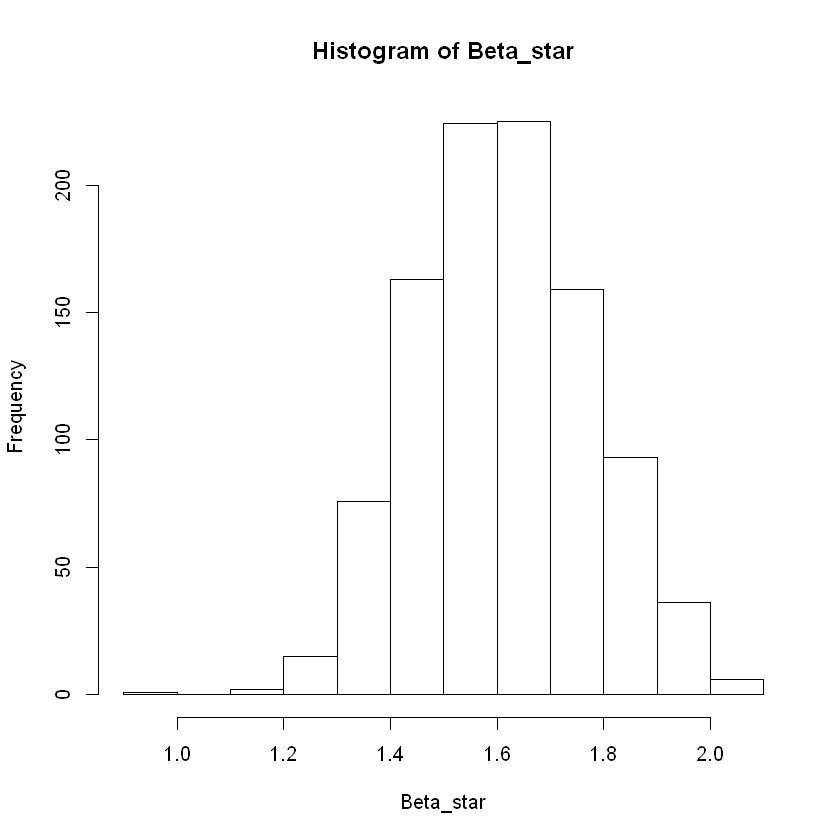

In [12]:
hist(Beta_star)
mean(Beta_star)
sd(Beta_star)

Normal 분포 모양<br>
mean은 많이 안 바뀌고 variance 줄음

In [13]:
D1<-coef(fit)[2]-sort(Beta_star)[m*0.025]
D2<-sort(Beta_star)[m*0.975]-coef(fit)[2]

In [14]:
c(coef(fit)[2]-D2,D1+coef(fit)[2] )

Case     Case 
1.305184 1.922427

CI 구간 짧아짐<br>